In [1]:
import sys

!sudo add-apt-repository ppa:saiarcot895/chromium-beta
!sudo apt remove chromium-browser
!pip3 install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/saiarcot895/chromium-beta/ubuntu/ jammy main'
Description:
This PPA contains the latest Chromium Beta builds, with hardware video decoding enabled (hidden behind a flag), and support for Widevine (needed for viewing many DRM-protected videos) enabled.

== Hardware Video Decoding ==

To enable hardware video decoding, start Chromium with the --enable-features=VaapiVideoDecoder argument. To make this persistent, create a file at /etc/chromium-browser/customizations/92-vaapi-hardware-decoding with the following contents:

CHROMIUM_FLAGS="${CHROMIUM_FLAGS} --enable-features=VaapiVideoDecoder"

See also https://wiki.archlinux.org/title/Chromium#Hardware_video_acceleration for more information on VAAPI video decoding support.

=== Widevine Support ===

The packages in this PPA have support for Widevine inside Chromium enabled. However, you still need to copy some files from 

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
#from webdriver_manager.chrome import ChromeDriverManager

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

service = Service('/usr/lib/chromium-browser/chromedriver')

driver = webdriver.Chrome(service=service, options=options)

In [3]:
url = 'https://www.yna.co.kr/theme/mostviewed/index?site=popularnews_btn_more'
driver.get(url)

columns = ['순위', '기사 제목', '기사 작성일']

rank = []
title = []
date = []

for i in range(1, 19):
  rank.append(i)
  title.append(driver.find_element(By.CSS_SELECTOR, '#container > div > div.content03 > section > div > ul > li:nth-child(' + str(i) + ') > div > div > strong > a > span').text)
  date.append(driver.find_element(By.CSS_SELECTOR, '#container > div > div.content03 > section > div > ul > li:nth-child(' + str(i) + ') > div > div > span').text)

In [4]:
import pandas as pd

df = pd.DataFrame({columns[0]: rank, columns[1]: title, columns[2]: date}, columns=columns)
df.head()

df.to_csv('top19_news.csv', index=False)

In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (21.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 127727 files and direc

In [6]:
import csv

#CSV 파일 읽어오기
f = open('top19_news.csv', 'r')
rdr = csv.reader(f)
f.close

title = ''

for line in rdr:
  title = title + ' ' + line[1]
  print(title)


 기사 제목
 기사 제목 HLB 간암신약, 미 FDA 승인 재차 불발…"보완요구서 받아"(종합)
 기사 제목 HLB 간암신약, 미 FDA 승인 재차 불발…"보완요구서 받아"(종합) 오만전 승리 놓친 홍명보 감독 "수비수들은 문제없었다"(종합)
 기사 제목 HLB 간암신약, 미 FDA 승인 재차 불발…"보완요구서 받아"(종합) 오만전 승리 놓친 홍명보 감독 "수비수들은 문제없었다"(종합) 尹대통령 탄핵심판 선고는 언제…빨라도 다음주 중후반 전망
 기사 제목 HLB 간암신약, 미 FDA 승인 재차 불발…"보완요구서 받아"(종합) 오만전 승리 놓친 홍명보 감독 "수비수들은 문제없었다"(종합) 尹대통령 탄핵심판 선고는 언제…빨라도 다음주 중후반 전망 홍명보호, B조 2위 요르단·3위 이라크에 승점 3차로 쫓겨
 기사 제목 HLB 간암신약, 미 FDA 승인 재차 불발…"보완요구서 받아"(종합) 오만전 승리 놓친 홍명보 감독 "수비수들은 문제없었다"(종합) 尹대통령 탄핵심판 선고는 언제…빨라도 다음주 중후반 전망 홍명보호, B조 2위 요르단·3위 이라크에 승점 3차로 쫓겨 美감독, 600억원 제작비를 코인·주식투자로 탕진…결국 기소돼
 기사 제목 HLB 간암신약, 미 FDA 승인 재차 불발…"보완요구서 받아"(종합) 오만전 승리 놓친 홍명보 감독 "수비수들은 문제없었다"(종합) 尹대통령 탄핵심판 선고는 언제…빨라도 다음주 중후반 전망 홍명보호, B조 2위 요르단·3위 이라크에 승점 3차로 쫓겨 美감독, 600억원 제작비를 코인·주식투자로 탕진…결국 기소돼 "제주 항공권 화∼목 저녁이 최저가" 한은 직원의 경제학적 분석
 기사 제목 HLB 간암신약, 미 FDA 승인 재차 불발…"보완요구서 받아"(종합) 오만전 승리 놓친 홍명보 감독 "수비수들은 문제없었다"(종합) 尹대통령 탄핵심판 선고는 언제…빨라도 다음주 중후반 전망 홍명보호, B조 2위 요르단·3위 이라크에 승점 3차로 쫓겨 美감독, 600억원 제작비를 코인·주식투자로 탕진…결국 기소돼 "제주 항공권 화∼목 저녁이 최

In [7]:
title = title[6:]
print(title)

 HLB 간암신약, 미 FDA 승인 재차 불발…"보완요구서 받아"(종합) 오만전 승리 놓친 홍명보 감독 "수비수들은 문제없었다"(종합) 尹대통령 탄핵심판 선고는 언제…빨라도 다음주 중후반 전망 홍명보호, B조 2위 요르단·3위 이라크에 승점 3차로 쫓겨 美감독, 600억원 제작비를 코인·주식투자로 탕진…결국 기소돼 "제주 항공권 화∼목 저녁이 최저가" 한은 직원의 경제학적 분석 의대생의 호소 "복귀자 공격 도 넘어…복귀 방해는 학습권 침해" 북 "최신 지대공미사일 시험발사 성공"…김정은 참관(종합) 軍, 이달 초 서해서 목선 탄 북한 주민 2명 발견…"표류 추정" 젠슨 황 "삼성 그래픽 메모리 최고"…제품에 친필 사인도 [재산공개] 이상민 前 장관, 1년 만에 6억5천만원 증가한 46억원 [샷!] "밥보다 잠이 중요하죠" 내주 방한 알래스카 주지사, 포스코·SK·GS 등과 개별면담 추진 'K-달걀' 미국 식탁에 더많이 오른다…美 "한국산 달걀 더 수입"(종합) 경남 양산 경부고속도로서 승용차·트럭 추돌…1명 사망 '尹체포 저지' 김성훈 경호차장 구속 갈림길…오늘 영장심사 '황희찬 선제골' 홍명보호, 북중미 월드컵 예선 오만과 1-1 비겨(종합) 전국 대체로 맑고 포근…수도권 미세먼지 '나쁨'


In [8]:
!pip install konlpy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 30.2 MB/s eta 0:00:00


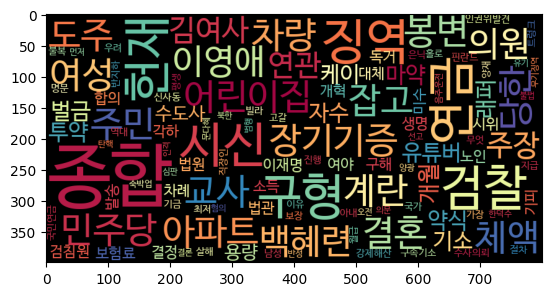

In [ ]:
#문자열 분석하기
okt = Okt()
nouns = okt.nouns(title)
words = [n for n in nouns if len(n) > 1]
c = Counter(words)

#워드클라우드 생성하기
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',\
scale=2.0, colormap='Spectral')
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [12]:
#인구통계
import pandas as pd

df = pd.read_csv('인구통계.csv', encoding = 'cp949')

columns = list(df.columns)

del columns[1]
popDiff = [ ]

for i in range(2, len(df)):
  row = [df.loc[i][0]]
  for j in range(2, len(df.loc[i])):
    pop = int(df.loc[i][j]) - int(df.loc[i][j - 1])
    row.append(pop)
  popDiff.append(row)

dfPopDiff = pd.DataFrame(popDiff, columns=columns)
dfPopDiff.to_csv('populationDiff.csv', encoding='cp949')

columns = list(df.columns)

del columns[1]
popIncreaseRate = [ ]

for i in range(2, len(df)):
  row = [df.loc[i][0]]
  for j in range(2 , len(df.loc[i])):
    pop = float((int(df.loc[i][j])-int(df.loc[i][j-1]))/int(df.loc[i][j-1])) * 100.0
    row.append(pop)
  popIncreaseRate.append(row)

dfPopIncreaseRate = pd.DataFrame(popIncreaseRate, columns=columns)
dfPopIncreaseRate.to_csv('인구증감비율.csv', encoding='cp949', index=False)

<ipython-input-12-ff9c8d691a15>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row = [df.loc[i][0]]
<ipython-input-12-ff9c8d691a15>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pop = int(df.loc[i][j]) - int(df.loc[i][j - 1])
<ipython-input-12-ff9c8d691a15>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row = [df.loc[i][0]]
<ipython-input-12-ff9c8d691a15>:29: FutureWarning: Series.__getitem__ treating keys as positions is 

In [13]:
import pandas as pd

df = pd.read_csv('populationDiff.csv', encoding = 'cp949')

popDiff = [ ]

for i in range(0, len(df)):
  popDiff.append(list(df.loc[i]))

#x축에 표시할 값
x_values = [ ]

for i in range(1, 7):
  yyyymm = '20220' + str(i)
  x_values.append(yyyymm)

#월 증감 인구수를 지역별 변수 y에 대입하기
y_seoul = popDiff[0][108:114]
y_bs = popDiff[1][108:114]
y_dg = popDiff[2][108:114]
y_ic = popDiff[3][108:114]
y_gj = popDiff[4][108:114]
y_dj = popDiff[5][108:114]
y_us = popDiff[6][108:114]
y_sj = popDiff[7][108:114]
y_gg = popDiff[8][108:114]
y_gw = popDiff[9][108:114]
y_cb = popDiff[10][108:114]
y_cn = popDiff[11][108:114]
y_jb = popDiff[12][108:114]
y_jn = popDiff[13][108:114]
y_gb = popDiff[14][108:114]
y_gn = popDiff[15][108:114]
y_jj = popDiff[16][108:114]

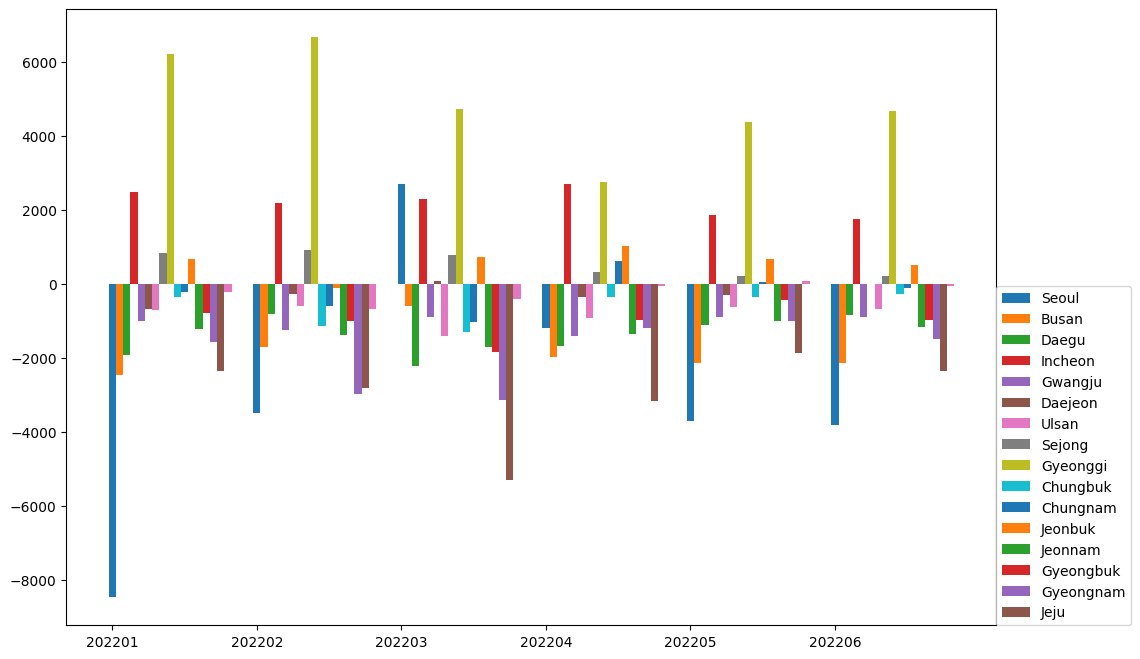

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,8))

ax = plt.subplot( )
bar_width = 0.05

x = np.arange(6)
ax.set_xticks(x)
ax.set_xticklabels(x_values)

p1 = plt.bar(x, y_seoul, bar_width)
p2 = plt.bar(x + bar_width, y_bs, bar_width)
p3 = plt.bar(x + bar_width*2, y_dg, bar_width)
p4 = plt.bar(x + bar_width*3, y_ic, bar_width)
p5 = plt.bar(x + bar_width*4, y_gj, bar_width)
p6 = plt.bar(x + bar_width*5, y_dj, bar_width)
p7 = plt.bar(x + bar_width*6, y_us, bar_width)
p8 = plt.bar(x + bar_width*7, y_sj, bar_width)
p9 = plt.bar(x + bar_width*8, y_gg, bar_width)
p10 = plt.bar(x + bar_width*9, y_gw, bar_width)
p11 = plt.bar(x + bar_width*10, y_cb, bar_width)
p12 = plt.bar(x + bar_width*11, y_cn, bar_width)
p13 = plt.bar(x + bar_width*12, y_jb, bar_width)
p14 = plt.bar(x + bar_width*13, y_jn, bar_width)
p15 = plt.bar(x + bar_width*14, y_gb, bar_width)
p16 = plt.bar(x + bar_width*15, y_gn, bar_width)
p17 = plt.bar(x + bar_width*16, y_jj, bar_width)

plt.legend(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon', 'Ulsan', 'Sejong', 'Gyeonggi', 'Chungbuk', 'Chungnam', 'Jeonbuk', 'Jeonnam', 'Gyeongbuk', 'Gyeongnam', 'Jeju'], loc = (1.0, 0))
plt.show( )